In [1]:
#Our task is to predict the most important parameters required 
#To reduce the features from 6 to 3

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor 
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt

In [2]:
feat_labels = ['a','b','c','d','e','f']

In [3]:
ip = pd.read_csv("Desktop/neural data/1497 input.csv")

In [4]:
ip.head()

,a,b,c,d,e,f
0,0.0,0.0,13.2,13.230,13.22,13.2
1,0.0,0.0,13.2,13.228,13.22,13.2
2,0.0,0.0,13.3,13.228,13.22,13.2
3,0.0,0.0,13.2,13.228,13.22,13.2
4,0.0,0.0,13.3,13.230,13.22,13.2


In [5]:
op = pd.read_csv("Desktop/neural data/1497 output.csv")

In [6]:
op.head()

,a,b,c,d,e,f,g
0,13.2,13.2,13.2,13.2,13.2,13.2,13.2
1,13.2,13.2,13.2,13.2,13.2,13.2,13.2
2,13.2,13.2,13.2,13.2,13.2,13.2,13.2
3,13.2,13.2,13.2,13.2,13.2,13.2,13.2
4,13.2,13.2,13.2,13.2,13.2,13.2,13.2


In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
print(scaler.fit(ip))
ip=scaler.transform(ip)
# ip is Normalized data

MinMaxScaler(copy=True, feature_range=(0, 1))


In [8]:
n_ip= pd.DataFrame(ip)
n_ip.columns=['a','b','c','d','e','f']
n_ip.head(50)

,a,b,c,d,e,f
0,0.000000,0.000000,0.00000,0.999137,0.000298,0.000000
1,0.000000,0.000000,0.00000,0.998274,0.000298,0.000000
2,0.000000,0.000000,0.00039,0.998274,0.000298,0.000000
3,0.000000,0.000000,0.00000,0.998274,0.000298,0.000000
4,0.000000,0.000000,0.00039,0.999137,0.000298,0.000000
5,0.000000,0.000000,0.00000,0.998274,0.000298,0.000000
6,0.000000,0.000000,0.00000,0.999137,0.000298,0.000000
7,0.000000,0.000000,0.00000,0.999137,0.000596,0.000000
8,0.000000,0.000000,0.00000,1.000000,0.000298,0.000000
9,0.000000,0.000000,0.00000,0.998274,0.000596,0.000000


In [9]:
from scipy import stats 
z=np.abs(stats.zscore(n_ip['a']))

In [10]:
n_ip['a']=n_ip['a'][(z<3)]
n_ip.notnull()

,a,b,c,d,e,f
0,False,True,True,True,True,True
1,False,True,True,True,True,True
2,False,True,True,True,True,True
3,False,True,True,True,True,True
4,False,True,True,True,True,True
...,...,...,...,...,...,...
51151,False,True,True,True,True,True
51152,False,True,True,True,True,True
51153,False,True,True,True,True,True
51154,False,True,True,True,True,True


In [11]:
n_ip.fillna(0.51375, inplace=True)

In [26]:
X = n_ip.drop('c',axis=1).drop('b',axis=1).drop('a',axis=1)

In [27]:
X

,d,e,f
0,0.999137,0.000298,0.0
1,0.998274,0.000298,0.0
2,0.998274,0.000298,0.0
3,0.998274,0.000298,0.0
4,0.999137,0.000298,0.0
...,...,...,...
51151,0.972810,0.000596,0.0
51152,0.971946,0.000596,0.0
51153,0.973241,0.000894,0.0
51154,0.974104,0.000596,0.0


In [28]:
y=op

In [29]:
y

,a,b,c,d,e,f,g
0,13.2,13.2,13.2,13.2,13.2,13.2,13.2
1,13.2,13.2,13.2,13.2,13.2,13.2,13.2
2,13.2,13.2,13.2,13.2,13.2,13.2,13.2
3,13.2,13.2,13.2,13.2,13.2,13.2,13.2
4,13.2,13.2,13.2,13.2,13.2,13.2,13.2
...,...,...,...,...,...,...,...
51151,13.2,13.2,13.2,13.5,13.2,13.2,13.5
51152,13.2,13.2,13.2,13.5,13.2,13.2,13.5
51153,13.2,13.2,13.2,13.5,13.3,13.2,13.5
51154,13.2,13.2,13.2,13.5,13.2,13.2,13.5


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10,random_state=99)

In [31]:
regressor = RandomForestRegressor(n_estimators = 1000, random_state=0, n_jobs=-1) 

In [32]:
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [33]:
y_pred = regressor.predict(X_test)

In [34]:
y_pred

array([[10.603015  ,  9.90658667, 28.75284976, ..., 35.80314786,
        19.08132857, 16.31888595],
       [11.3       , 10.        , 26.90013333, ..., 32.32054912,
        17.43974218, 15.79622856],
       [11.3       , 10.        , 26.9       , ..., 32.3       ,
        17.50751362, 16.08471857],
       ...,
       [13.1       , 11.10810218, 14.20749107, ..., 14.2805878 ,
        13.3885124 , 14.50506731],
       [12.9       , 10.45575702, 15.7       , ..., 16.06076262,
        13.6       , 13.58367094],
       [13.1       , 11.08938602, 14.2053142 , ..., 14.28961103,
        13.4053142 , 15.06533369]])

In [35]:
y_pred[0]

array([10.603015  ,  9.90658667, 28.75284976, 13.95821595, 35.80314786,
       19.08132857, 16.31888595])

In [36]:
test_set_rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))

test_set_r2 = r2_score(y_test, y_pred) 

In [37]:
print(test_set_rmse)


0.18240801396511191


In [38]:
print(test_set_r2)


0.977487184054206


In [56]:
atest=y_test['a']
atest=atest.head(n=100)
apred=y_pred[:100:,0]
x=np.arange(0,100)

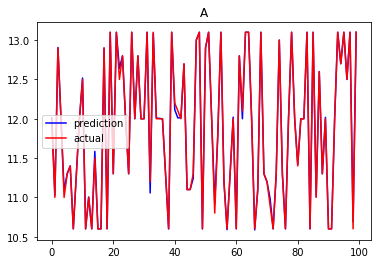

In [57]:
plt.title('A')
plt.plot(x,apred,'b-',label='prediction')
plt.plot(x,atest,'r-',label='actual')
plt.legend()
plt.show()

In [58]:
btest=y_test['b']
btest=btest.head(n=100)
bpred=y_pred[:100:,1]
x=np.arange(0,100)

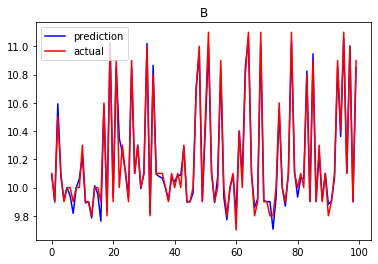

In [59]:
plt.title('B')
plt.plot(x,bpred,'b-',label='prediction')
plt.plot(x,btest,'r-',label='actual')
plt.legend()
plt.show()

In [60]:
ctest=y_test['c']
ctest=ctest.head(n=100)
cpred=y_pred[:100:,2]
x=np.arange(0,100)

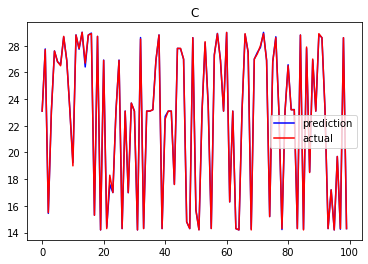

In [61]:
plt.title('C')
plt.plot(x,cpred,'b-',label='prediction')
plt.plot(x,ctest,'r-',label='actual')
plt.legend()
plt.show()

In [62]:
dtest=y_test['d']
dtest=dtest.head(n=100)
dpred=y_pred[:100:,3]
x=np.arange(0,100)

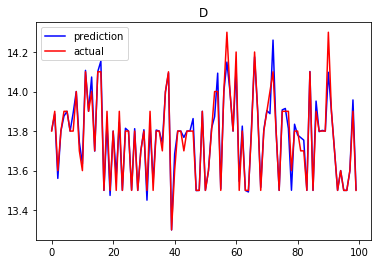

In [63]:
plt.title('D')
plt.plot(x,dpred,'b-',label='prediction')
plt.plot(x,dtest,'r-',label='actual')
plt.legend()
plt.show()

In [64]:
etest=y_test['e']
etest=etest.head(n=100)
epred=y_pred[:100:,4]
x=np.arange(0,100)

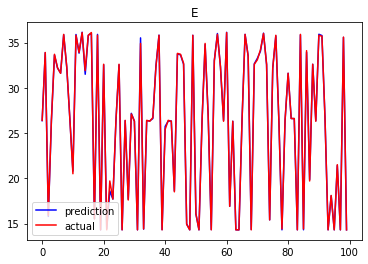

In [65]:
plt.title('E')
plt.plot(x,epred,'b-',label='prediction')
plt.plot(x,etest,'r-',label='actual')
plt.legend()
plt.show()

In [66]:
ftest=y_test['f']
ftest=ftest.head(n=100)
fpred=y_pred[:100:,5]
x=np.arange(0,100)

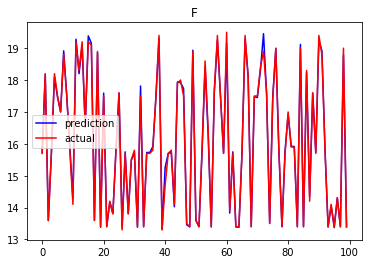

In [67]:
plt.title('F')
plt.plot(x,fpred,'b-',label='prediction')
plt.plot(x,ftest,'r-',label='actual')
plt.legend()
plt.show()

In [68]:
gtest=y_test['g']
gtest=gtest.head(n=100)
gpred=y_pred[:100:,6]
x=np.arange(0,100)

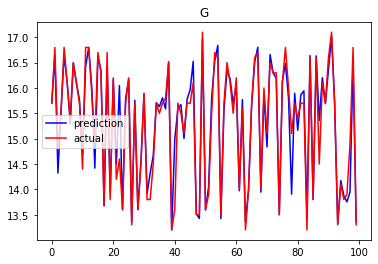

In [69]:
plt.title('G')
plt.plot(x,gpred,'b-',label='prediction')
plt.plot(x,gtest,'r-',label='actual')
plt.legend()
plt.show()